In [1]:
import camelot
import pandas as pd
import os

In [4]:
file_loc = r'C:\Users\digvi\Desktop\ChiStats\PyTesseract\PyTessearct Core Config\Test\Camelot\Final\Data\DRAGO SUPPLY CO\4403774992\4403774992.pdf'

In [2]:
def read_pdf_normal(file_loc):
    tables = camelot.read_pdf(filepath=file_loc)

    return tables

In [3]:
def save_contour(tables, file_name, save_loc):
    # plot on figure
    contour_plots = camelot.plot(tables[0], kind='contour')

    # save figure
    s1 = file_name + '_contour.jpg'
    s2 = save_loc + '\\' + s1

    # print location
    print('contour plot file saving at: ', s2)

    contour_plots.savefig(s2, dpi=300)


In [4]:
def save_line_plot(tables, file_name, save_loc):
    # plot on figure
    line_plots = camelot.plot(tables[0], kind='line')

    # save figure
    s1 = file_name + '_lines.jpg'
    s2 = save_loc + '\\' + s1

    # print location
    print('Line plot file saving at: ', s2)

    line_plots.savefig(s2, dpi=300)

In [6]:
def save_csv(file_name, save_loc):
    tables = camelot.read_pdf(filepath=file_loc, flavor='stream', pages='all')

    save_at = save_loc + '\\' +  file_name + '.csv'

    tables.export(save_at, f='csv', compress = True)

-----------------------------------
Now Running:  Data\DEER PARK LUMBER\4403793446\4403793446.pdf
Not able to detect table in:  Data\DEER PARK LUMBER\4403793446\4403793446.pdf
-----------------------------------
-----------------------------------
Now Running:  Data\DEER PARK LUMBER\4403806716\4403806716.pdf
Not able to detect table in:  Data\DEER PARK LUMBER\4403806716\4403806716.pdf
-----------------------------------
-----------------------------------
Now Running:  Data\DRAGO SUPPLY CO\4403695844\4403695844.pdf
contour plot file saving at:  Data\DRAGO SUPPLY CO\4403695844\4403695844_contour.jpg
Line plot file saving at:  Data\DRAGO SUPPLY CO\4403695844\4403695844_lines.jpg
-----------------------------------
-----------------------------------
Now Running:  Data\DRAGO SUPPLY CO\4403774992\4403774992.pdf
contour plot file saving at:  Data\DRAGO SUPPLY CO\4403774992\4403774992_contour.jpg
Line plot file saving at:  Data\DRAGO SUPPLY CO\4403774992\4403774992_lines.jpg
----------------

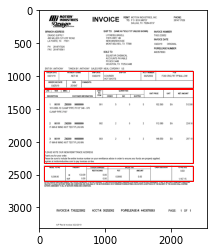

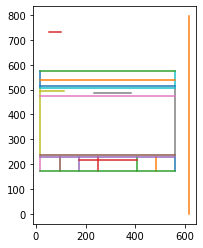

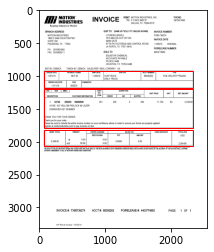

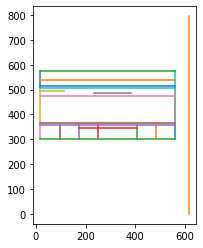

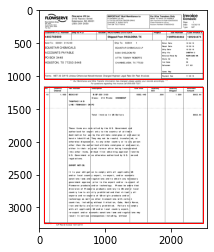

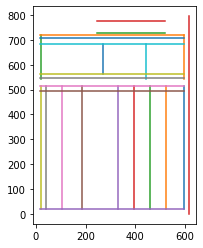

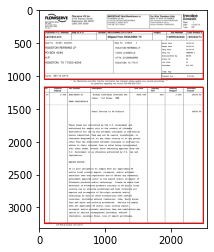

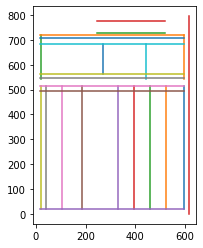

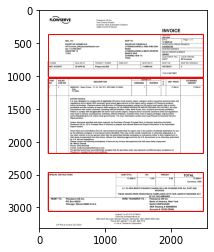

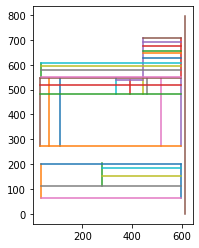

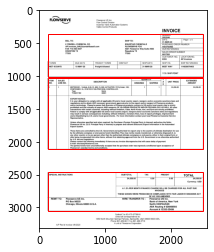

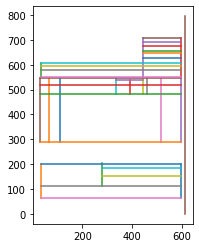

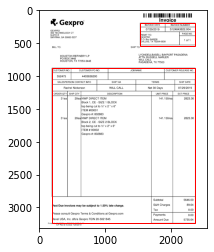

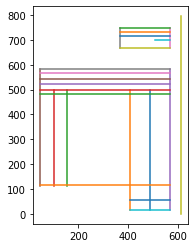

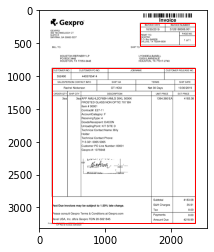

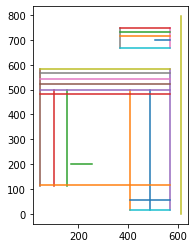

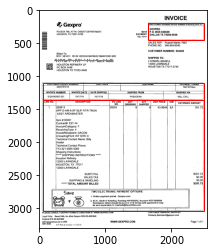

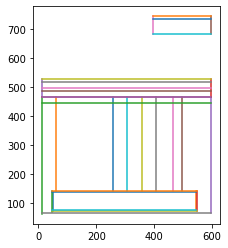

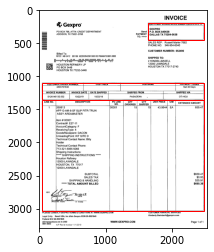

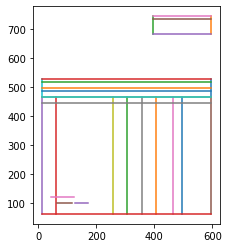

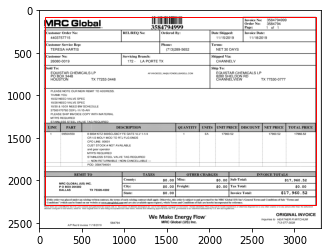

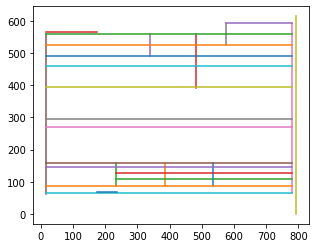

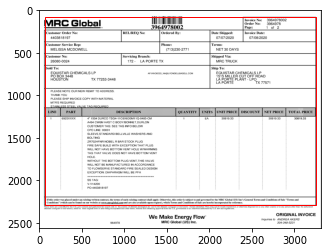

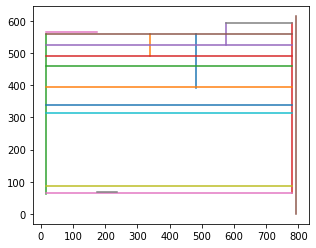

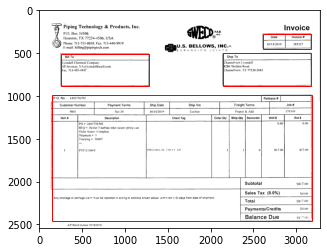

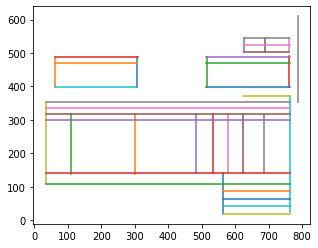

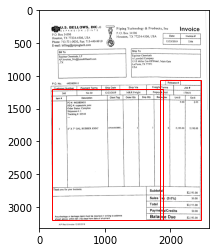

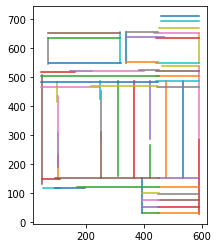

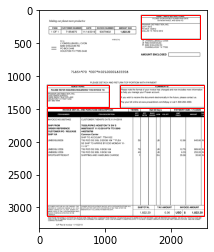

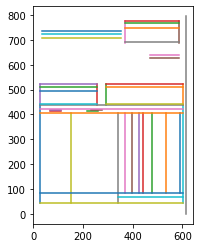

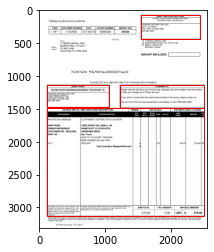

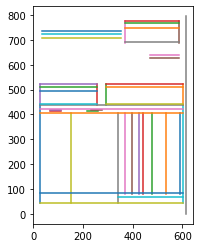

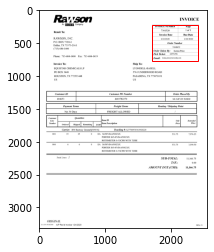

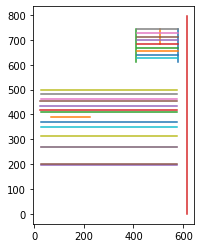

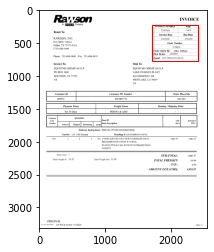

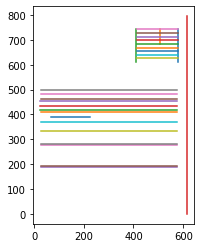

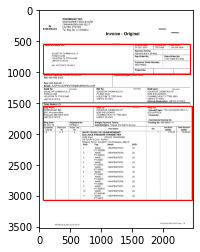

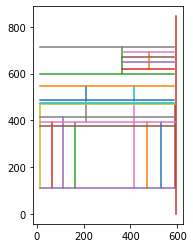

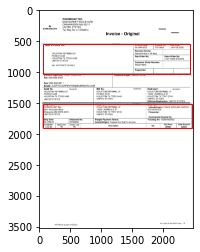

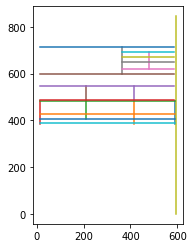

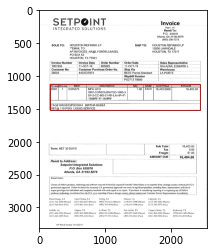

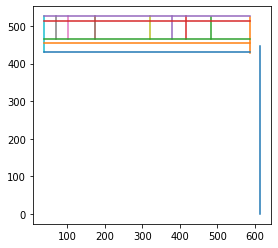

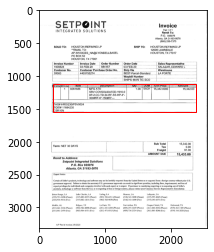

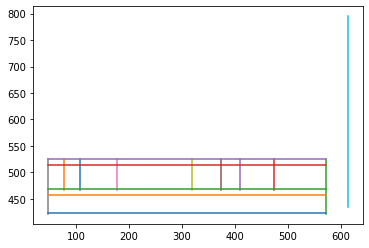

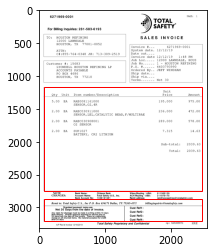

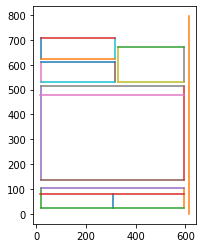

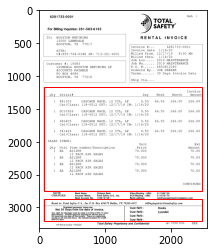

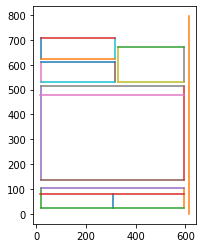

In [7]:
directory = 'Data'
detected_dirs = []
exception_dirs = []

for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        os.path.join(root, subdirectory)
        #print(root)
    for file in files:
        if(file.endswith('.pdf')):
            file_loc = os.path.join(root, file)
            file_name = os.path.splitext(file)[0]
            file_save_loc = os.path.dirname(file_loc)
            
            # call table function
            tables = read_pdf_normal(file_loc)
            print("-----------------------------------")
            print("Now Running: ", file_loc)
            

            if(len(tables) > 0):
                # call contour function
                save_contour(tables, file_name, file_save_loc)
                # call line plot function
                save_line_plot(tables, file_name, file_save_loc)

                # call save csv function
                save_csv(file_name, file_save_loc)
                detected_dirs.append(file_loc)


                print("-----------------------------------")
            else:
                print('Not able to detect table in: ', file_loc)
                exception_dirs.append(file_loc)
                print("-----------------------------------")

In [8]:
detected_dirs

['Data\\DRAGO SUPPLY CO\\4403695844\\4403695844.pdf',
 'Data\\DRAGO SUPPLY CO\\4403774992\\4403774992.pdf',
 'Data\\FLOWSERVE4\\4403768909\\4403768909.pdf',
 'Data\\FLOWSERVE4\\4403801203\\4403801203.pdf',
 'Data\\FLOWSERVE6\\4403693166\\4403693166.pdf',
 'Data\\FLOWSERVE6\\4403755483\\4403755483.pdf',
 'Data\\GEXPRO1\\4403636200_3\\4403636200_3.pdf',
 'Data\\GEXPRO1\\4403765414\\4403765414.pdf',
 'Data\\GEXPRO2\\4403761518_3\\4403761518_3.pdf',
 'Data\\GEXPRO2\\4403761630\\4403761630.pdf',
 'Data\\MRC Global\\4403757715\\4403757715.pdf',
 'Data\\MRC Global\\4403818197\\4403818197.pdf',
 'Data\\PIPING TECHNOLOGY & PRODUCTS INC\\4403756703\\4403756703.pdf',
 'Data\\PIPING TECHNOLOGY & PRODUCTS INC\\4403809011\\4403809011.pdf',
 'Data\\PRAXAIR DISTRIBUTION INC\\4403780798\\4403780798.pdf',
 'Data\\PRAXAIR DISTRIBUTION INC\\4403804905\\4403804905.pdf',
 'Data\\RAWSON INC\\4403782270\\4403782270.pdf',
 'Data\\RAWSON INC\\4403802736\\4403802736.pdf',
 'Data\\ROSEMOUNT INC\\4403789930\\44037

In [9]:
exception_dirs

['Data\\DEER PARK LUMBER\\4403793446\\4403793446.pdf',
 'Data\\DEER PARK LUMBER\\4403806716\\4403806716.pdf',
 'Data\\WHOLESALE ELECTRIC SUPPLY CO\\4403728985_INVOICE1\\4403728985_INVOICE1.pdf',
 'Data\\WHOLESALE ELECTRIC SUPPLY CO\\4403730382_INVOICE1\\4403730382_INVOICE1.pdf']